In [131]:
#modulo de manejo de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
#modulos de graficas
import seaborn as sns; sns.set()
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import metrics

In [133]:
datos = pd.read_csv('winemag-data-130k-v2.csv')

In [134]:
#visualizar los primeros 5 registros
datos.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [135]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [136]:
datos.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [137]:
datos[['country','variety','winery','taster_name','taster_twitter_handle','province','region_1','region_2']].describe()

,country,variety,winery,taster_name,taster_twitter_handle,province,region_1,region_2
count,129908,129970,129971,103727,98758,129908,108724,50511
unique,43,707,16757,19,15,425,1229,17
top,US,Pinot Noir,Wines & Winemakers,Roger Voss,@vossroger,California,Napa Valley,Central Coast
freq,54504,13272,222,25514,25514,36247,4480,11065


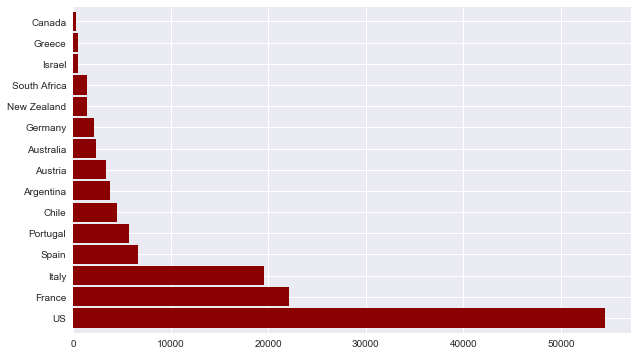

In [138]:
datos.country.value_counts().head(15).plot.barh(width=0.9,figsize=(10,6),color='darkred');

In [139]:
#porcentaje de vinos por cada pais
(datos.country.value_counts(normalize=True)*100).head(6)

US          41.955846
France      17.006651
Italy       15.041414
Spain        5.115158
Portugal     4.380793
Chile        3.442436
Name: country, dtype: float64

In [140]:
datos.variety.value_counts().head(70)

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

In [141]:
#Analizando US por tener el mayor %
US = datos[datos['country'] == 'US']

In [142]:
US.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [143]:
years = US.title.str.extract('([1-2][0-9]{3})').astype(float)
years[years < 1990] = None
US = US.assign(year = years)
US=US.dropna(subset=['price'])

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



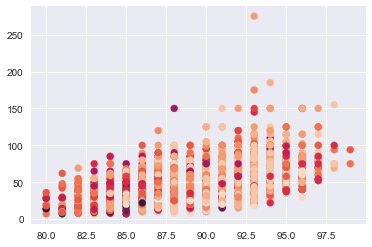

In [144]:
#En la data principal Pinot Noir es la variedad mas 
plt.scatter(x=US[US['variety'] == 'Pinot Noir']['points'],y=US[US['variety'] == 'Pinot Noir']['price'],c=US[US['variety'] == 'Pinot Noir']['year']);

In [145]:
US[US['variety'] == 'Pinot Noir']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
21,21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat,2013.0
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,2011.0
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,2010.0
41,41,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars,2009.0
78,78,US,Some rosés are made simply by bleeding the jui...,Rosé of,86,25.0,Oregon,Eola-Amity Hills,Willamette Valley,Paul Gregutt,@paulgwine,Z'IVO 2015 Rosé of Pinot Noir (Eola-Amity Hills),Pinot Noir,Z'IVO,2015.0
145,145,US,"Cooked cranberry is spiced with anise, pepperc...",Guidotti Vineyard,91,64.0,California,Santa Lucia Highlands,Central Coast,Matt Kettmann,@mattkettmann,Testarossa 2013 Guidotti Vineyard Pinot Noir (...,Pinot Noir,Testarossa,2013.0
152,152,US,"From a promising new project, the nose of this...",Estate Reserve,91,55.0,California,Carmel Valley,Central Coast,Matt Kettmann,@mattkettmann,Albatross Ridge 2012 Estate Reserve Pinot Noir...,Pinot Noir,Albatross Ridge,2012.0
169,169,US,This wine is put together from multiple vineya...,Dutton Ranch,91,44.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2014 Dutton Ranch Pinot Noir ...,Pinot Noir,Dutton-Goldfield,2014.0
173,173,US,This wine is bursting with gorgeous cherry fru...,NaN,91,38.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Le Cadeau 2014 Pinot Noir (Willamette Valley),Pinot Noir,Le Cadeau,2014.0


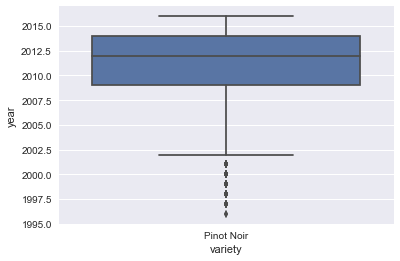

In [146]:
sns.boxplot(x='variety', y='year', data = US[US['variety'] == 'Pinot Noir'])

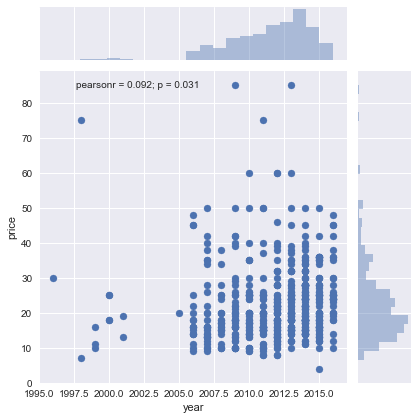

In [147]:
sns.jointplot(x='year',y='price',data=US[US['variety'] == 'White Blend']);

In [148]:
US = US.drop_duplicates('description')

In [149]:
US.shape

(50230, 15)

In [150]:
US.variety.value_counts()

Pinot Noir                      9138
Cabernet Sauvignon              6792
Chardonnay                      6244
Syrah                           2999
Red Blend                       2730
Zinfandel                       2521
Merlot                          2139
Sauvignon Blanc                 1990
Bordeaux-style Red Blend        1684
Riesling                        1595
Cabernet Franc                   919
Rosé                             808
Pinot Gris                       789
Viognier                         728
Petite Sirah                     681
Sparkling Blend                  631
Rhône-style Red Blend            630
White Blend                      583
Grenache                         488
Malbec                           483
Sangiovese                       396
Gewürztraminer                   374
Pinot Grigio                     334
Tempranillo                      315
Meritage                         234
Barbera                          212
Petit Verdot                     208
R

In [151]:
US = US.groupby('variety').filter(lambda x: len(x) >500)

In [152]:
wine_us =US.variety.unique().tolist()
wine_us.sort()

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X = US.drop(['Unnamed: 0','country','designation','points','province','taster_name',
       'taster_twitter_handle', 'title','region_1','region_2','variety','winery'], axis = 1)
y = US.variety
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32700, 3) (10901, 3) (32700,) (10901,)


In [155]:
output = set()
for x in US.variety:
    x = x.lower()
    x = x.split()
    for y in x:
        output.add(y)
variety_list =sorted(output)

In [156]:
extras = ['.', ',', '"', "'", '?', '!', ':', ';','-' ,'(', ')', '[', ']', '{', '}', 'cab',"%"]
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.update(variety_list)
stop.update(extras)

In [157]:
US.variety.value_counts()

Pinot Noir                  9138
Cabernet Sauvignon          6792
Chardonnay                  6244
Syrah                       2999
Red Blend                   2730
Zinfandel                   2521
Merlot                      2139
Sauvignon Blanc             1990
Bordeaux-style Red Blend    1684
Riesling                    1595
Cabernet Franc               919
Rosé                         808
Pinot Gris                   789
Viognier                     728
Petite Sirah                 681
Sparkling Blend              631
Rhône-style Red Blend        630
White Blend                  583
Name: variety, dtype: int64

In [158]:
US.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2011.0
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,2012.0


In [159]:
sum(US['year']>2002)

41488

In [160]:
datos_=US[US['year']>2002] 

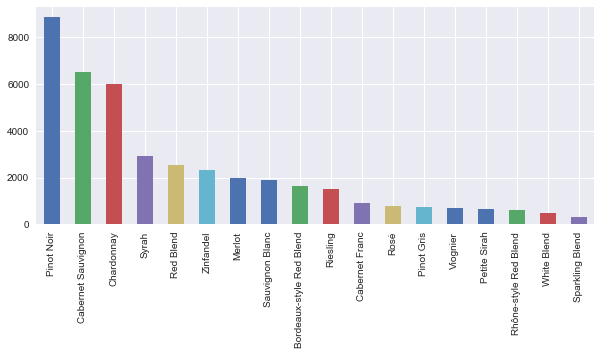

In [161]:
plt.figure(figsize=(10,4))
datos_.variety.value_counts().plot.bar()

In [162]:
rep_v = datos_.groupby('variety')['year'].agg('median')

In [163]:
for i in rep_v.index :
    datos_.loc[(datos_['year'].isna()) & (datos_['variety'] == i),'year']=rep_v[i]

C:\Users\helen\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [164]:
datos_.variety.describe()

count          41488
unique            18
top       Pinot Noir
freq            8861
Name: variety, dtype: object

In [165]:
#data necesaria
#Tomando las provincias como dummy
X_ = datos_.drop(['Unnamed: 0','designation','country','taster_name',
       'taster_twitter_handle', 'title','region_1','region_2','variety','winery'], axis = 1)
X = pd.get_dummies(X_,columns=["province"])
y = datos_.variety

In [166]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41488 entries, 2 to 129967
Data columns (total 26 columns):
description                   41488 non-null object
points                        41488 non-null int64
price                         41488 non-null float64
year                          41488 non-null float64
province_America              41488 non-null uint8
province_Arizona              41488 non-null uint8
province_California           41488 non-null uint8
province_Colorado             41488 non-null uint8
province_Connecticut          41488 non-null uint8
province_Idaho                41488 non-null uint8
province_Kentucky             41488 non-null uint8
province_Massachusetts        41488 non-null uint8
province_Michigan             41488 non-null uint8
province_Missouri             41488 non-null uint8
province_Nevada               41488 non-null uint8
province_New Jersey           41488 non-null uint8
province_New Mexico           41488 non-null uint8
province_New York 

In [167]:
X.head()

,description,points,price,year,province_America,province_Arizona,province_California,province_Colorado,province_Connecticut,province_Idaho,...,province_New Mexico,province_New York,province_North Carolina,province_Ohio,province_Oregon,province_Pennsylvania,province_Texas,province_Virginia,province_Washington,province_Washington-Oregon
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,2013.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,2013.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Much like the regular bottling from 2012, this...",87,65.0,2012.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,2011.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,2012.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
from sklearn.feature_extraction.text import CountVectorizer 

In [169]:
#generando variable de textmining
from scipy.sparse import hstack
vect = CountVectorizer(stop_words = stop)
X_dtm = vect.fit_transform(X.description)
Xs = X.drop(['description'],axis=1).as_matrix()
X_dtm = hstack((Xs,X_dtm))
X_dtm

<41488x17861 sparse matrix of type '<class 'numpy.float64'>'
	with 1171858 stored elements in COOrdinate format>

In [170]:
X_dtm.shape,X.shape

((41488, 17861), (41488, 26))

In [171]:
len(y)

41488

In [172]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_dtm,y,random_state=1)

In [173]:
wine=y.unique()

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
models = {}
for z in wine:
    model = LogisticRegression()
    y = ytrain == z
    model.fit(Xtrain, y)
    models[z] = model
testing_probs = pd.DataFrame(columns = wine)

In [176]:
len(wine)

18

In [177]:
probs = pd.DataFrame(columns = wine)

In [178]:
for z in wine: 
    probs[z] = models[z].predict_proba(Xtest)[:,1]

In [179]:
probs.head()

,Pinot Gris,Riesling,Pinot Noir,Cabernet Sauvignon,Chardonnay,Red Blend,Merlot,Sauvignon Blanc,Cabernet Franc,Bordeaux-style Red Blend,Petite Sirah,Zinfandel,Viognier,Syrah,Rhône-style Red Blend,White Blend,Rosé,Sparkling Blend
0,1.280671e-03,0.000018,0.601560,0.044142,0.000900,0.012491,0.068546,0.003287,0.000373,0.005924,0.002273,0.149577,0.000067,0.006653,0.003986,0.000192,0.001059,0.000504
1,1.139895e-04,0.000328,0.000182,0.037993,0.000004,0.096304,0.166448,0.000222,0.007651,0.224958,0.006197,0.002282,0.000007,0.079794,0.003692,0.000185,0.000123,0.000038
2,5.084051e-02,0.010669,0.000135,0.007396,0.332776,0.009777,0.006438,0.022551,0.000926,0.000888,0.000122,0.000819,0.001406,0.055787,0.001118,0.009492,0.001027,0.000759
3,7.234385e-07,0.000058,0.171824,0.035551,0.000204,0.010991,0.003174,0.000194,0.001742,0.002116,0.016454,0.002944,0.000018,0.725865,0.004025,0.000095,0.000278,0.000456
4,3.268903e-05,0.000006,0.000388,0.479417,0.000013,0.088891,0.009160,0.000125,0.025241,0.001096,0.198367,0.339130,0.000002,0.346425,0.004193,0.000001,0.000021,0.000003


In [180]:
probs_=probs.fillna(0)

In [181]:
pred = probs.idxmax(axis=1)

In [182]:
comparison = pd.DataFrame({'actual':ytest.values, 'predicted':pred.values})   

In [183]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [184]:
print('Accuracy Score:',accuracy_score(comparison.actual, comparison.predicted)*100,"%")

Accuracy Score: 65.11762437331276 %


In [185]:
comparison.head(50)

,actual,predicted
0,Pinot Noir,Pinot Noir
1,Cabernet Sauvignon,Bordeaux-style Red Blend
2,Chardonnay,Chardonnay
3,Syrah,Syrah
4,Merlot,Cabernet Sauvignon
5,Pinot Noir,Pinot Noir
6,Chardonnay,Chardonnay
7,Pinot Noir,Pinot Noir
8,Syrah,Cabernet Sauvignon
9,Merlot,Syrah


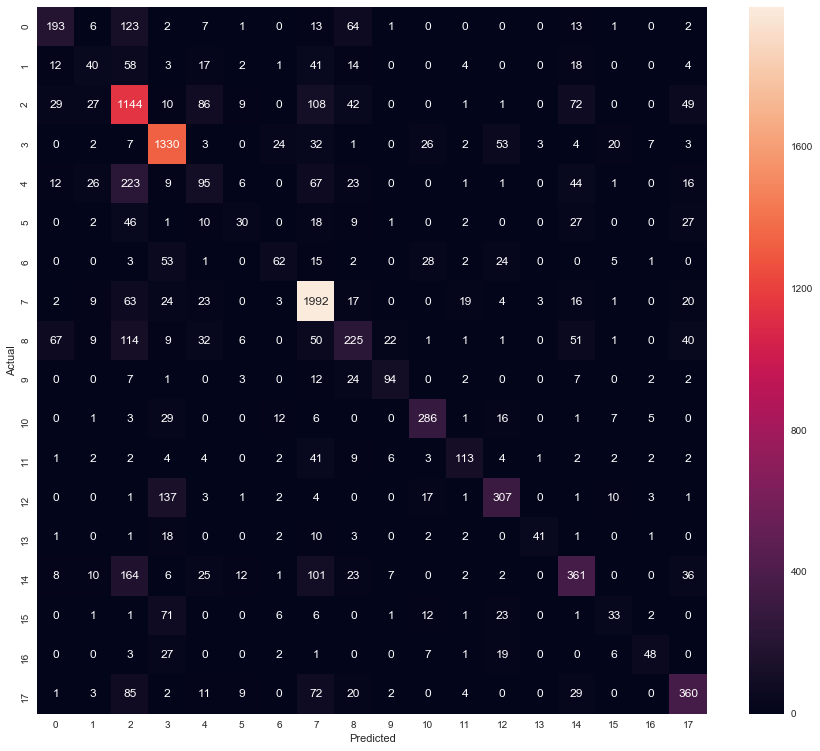

In [186]:
from  sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(comparison.actual, comparison.predicted)
fig, ax = plt.subplots(figsize=(15,13))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [187]:
print (classification_report(comparison.actual, comparison.predicted))

                          precision    recall  f1-score   support

Bordeaux-style Red Blend       0.59      0.45      0.51       426
          Cabernet Franc       0.29      0.19      0.23       214
      Cabernet Sauvignon       0.56      0.72      0.63      1578
              Chardonnay       0.77      0.88      0.82      1517
                  Merlot       0.30      0.18      0.23       524
            Petite Sirah       0.38      0.17      0.24       173
              Pinot Gris       0.53      0.32      0.40       196
              Pinot Noir       0.77      0.91      0.83      2196
               Red Blend       0.47      0.36      0.41       629
   Rhône-style Red Blend       0.70      0.61      0.65       154
                Riesling       0.75      0.78      0.76       367
                    Rosé       0.71      0.56      0.63       200
         Sauvignon Blanc       0.67      0.63      0.65       488
         Sparkling Blend       0.85      0.50      0.63        82
         

In [188]:
from sklearn.naive_bayes import MultinomialNB

In [189]:
models = {}
for z in wine:
    model = MultinomialNB()
    y = ytrain == z
    model.fit(Xtrain, y)
    models[z] = model
testing_probs = pd.DataFrame(columns = wine)

In [190]:
probs = pd.DataFrame(columns = wine)

In [191]:
for z in wine: 
    probs[z] = models[z].predict_proba(Xtest)[:,1]

In [192]:
probs.head()


,Pinot Gris,Riesling,Pinot Noir,Cabernet Sauvignon,Chardonnay,Red Blend,Merlot,Sauvignon Blanc,Cabernet Franc,Bordeaux-style Red Blend,Petite Sirah,Zinfandel,Viognier,Syrah,Rhône-style Red Blend,White Blend,Rosé,Sparkling Blend
0,2.552023e-18,1.234683e-13,2.959744e-03,1.751493e-06,1.225447e-07,0.000058,1.527462e-04,1.202152e-11,1.629146e-11,2.060432e-11,7.091552e-16,1.013057e-04,3.675691e-18,5.253375e-07,1.071804e-18,4.457304e-23,1.488583e-15,2.181083e-36
1,7.074538e-18,1.296398e-12,2.078775e-08,3.327193e-08,1.556329e-15,0.126176,3.410483e-02,3.541141e-12,4.455420e-09,1.017479e-10,7.898884e-14,8.666944e-06,1.820205e-18,2.267323e-04,5.715984e-16,5.596743e-22,3.900120e-16,3.925441e-41
2,6.441871e-12,2.254774e-08,9.851960e-09,2.401288e-09,1.502665e-01,0.000008,4.569071e-06,9.229836e-07,6.658967e-13,5.104419e-13,4.124708e-19,3.140485e-08,1.636060e-12,7.944267e-06,1.131821e-19,3.684320e-18,4.801078e-14,3.216289e-37
3,1.107900e-27,3.373059e-22,9.972753e-01,3.982079e-03,4.973246e-15,0.000056,4.033595e-08,7.651473e-18,4.953157e-10,1.029056e-05,1.970648e-11,7.710417e-08,6.806634e-23,9.928414e-01,1.435698e-11,6.500705e-27,3.919689e-20,6.785594e-33
4,5.342985e-26,8.852143e-22,1.360725e-04,2.811569e-04,3.441634e-19,0.025111,4.090077e-04,2.950494e-17,6.070914e-09,1.564321e-10,4.745779e-10,1.662905e-02,1.368634e-23,6.597343e-01,4.329846e-13,1.200332e-29,3.656338e-21,1.688941e-42


In [193]:
probs_=probs.fillna(0)

In [194]:
pred = probs.idxmax(axis=1)

In [195]:
comparison = pd.DataFrame({'actual':ytest.values, 'predicted':pred.values})   

In [196]:
print('Accuracy Score:',accuracy_score(comparison.actual, comparison.predicted)*100,"%")

Accuracy Score: 55.67875048206711 %


In [197]:
from sklearn import preprocessing 

In [198]:
le  =  preprocessing.LabelEncoder() 

In [199]:
le.fit(datos_['variety'])  

LabelEncoder()

In [200]:
le.transform(datos_['variety'])  

array([ 6, 10,  7, ..., 17, 17,  7], dtype=int64)

In [201]:
datos_['var_codes'] = le.fit_transform(datos_['variety'])

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [202]:
X_train, X_test, y_train, y_test = train_test_split(datos_['description'],datos_['var_codes'], test_size=0.33, random_state=42)

In [203]:
modelo_cvec = CountVectorizer(stop_words=stop)

In [204]:
X_train = modelo_cvec.fit_transform(X_train)

In [205]:
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [206]:
# Predicción
X_test = modelo_cvec.transform(X_test)
labels_predichas = modelo_NB.predict(X_test)

In [207]:
accuracy_score(y_test, labels_predichas)

0.5838445807770961

In [208]:
print (classification_report(y_test, labels_predichas))

             precision    recall  f1-score   support

          0       0.71      0.24      0.35       565
          1       0.36      0.03      0.06       293
          2       0.48      0.75      0.58      2216
          3       0.64      0.93      0.76      2002
          4       0.26      0.04      0.07       675
          5       0.00      0.00      0.00       223
          6       0.70      0.03      0.05       268
          7       0.66      0.87      0.75      2871
          8       0.47      0.39      0.43       822
          9       0.85      0.15      0.25       197
         10       0.69      0.64      0.66       504
         11       0.72      0.31      0.43       231
         12       0.70      0.43      0.54       658
         13       1.00      0.05      0.10        92
         14       0.49      0.39      0.43       950
         15       0.67      0.01      0.02       213
         16       0.71      0.03      0.06       158
         17       0.53      0.50      0.52   

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [209]:
#data necesaria
#sin dummies
X_ = datos_.drop(['Unnamed: 0','designation','country','taster_name','province',
       'taster_twitter_handle', 'title','region_1','region_2','variety','winery','var_codes'], axis = 1)

y = datos_.variety

In [210]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41488 entries, 2 to 129967
Data columns (total 4 columns):
description    41488 non-null object
points         41488 non-null int64
price          41488 non-null float64
year           41488 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ MB


In [211]:
#generando variable de textmining
from scipy.sparse import hstack
vect = CountVectorizer(stop_words = stop)
X_dtm = vect.fit_transform(X_.description)
Xs = X_.drop(['description'],axis=1).as_matrix()
X_dtm = hstack((Xs,X_dtm))
X_dtm

<41488x17839 sparse matrix of type '<class 'numpy.float64'>'
	with 1130370 stored elements in COOrdinate format>

In [212]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_dtm,y,random_state=1)

In [213]:
wine=y.unique()

In [214]:
models = {}
for z in wine:
    model = LogisticRegression()
    y = ytrain == z
    model.fit(Xtrain, y)
    models[z] = model
testing_probs = pd.DataFrame(columns = wine)

In [215]:
probs = pd.DataFrame(columns = wine)

In [216]:
for z in wine: 
    probs[z] = models[z].predict_proba(Xtest)[:,1]

In [217]:
probs.head()

,Pinot Gris,Riesling,Pinot Noir,Cabernet Sauvignon,Chardonnay,Red Blend,Merlot,Sauvignon Blanc,Cabernet Franc,Bordeaux-style Red Blend,Petite Sirah,Zinfandel,Viognier,Syrah,Rhône-style Red Blend,White Blend,Rosé,Sparkling Blend
0,0.001451,0.000082,0.806349,0.020909,0.001476,0.010994,0.076082,0.005175,0.001364,0.016433,0.002029,0.114251,0.000065,0.012491,0.003137,0.000207,0.000668,0.000394
1,0.000096,0.000369,0.005645,0.010105,0.000015,0.076978,0.065407,0.000346,0.010436,0.225615,0.012831,0.009388,0.000007,0.019042,0.002589,0.000222,0.000142,0.000056
2,0.092649,0.013187,0.002792,0.004627,0.282195,0.006370,0.007148,0.009404,0.002453,0.001666,0.000226,0.004904,0.001569,0.035439,0.000893,0.012006,0.001041,0.001368
3,0.000001,0.000151,0.109049,0.047637,0.000254,0.012199,0.004916,0.000590,0.002079,0.002520,0.012002,0.002282,0.000015,0.858590,0.004127,0.000098,0.000159,0.000423
4,0.000010,0.000009,0.000130,0.535391,0.000026,0.100580,0.023024,0.000617,0.031811,0.001628,0.271893,0.210576,0.000004,0.401717,0.005321,0.000002,0.000013,0.000003


In [218]:
probs_=probs.fillna(0)

In [219]:
pred = probs.idxmax(axis=1)

In [220]:
comparison = pd.DataFrame({'actual':ytest.values, 'predicted':pred.values})   

In [221]:
print('Accuracy Score:',accuracy_score(comparison.actual, comparison.predicted)*100,"%")

Accuracy Score: 63.41110682607018 %


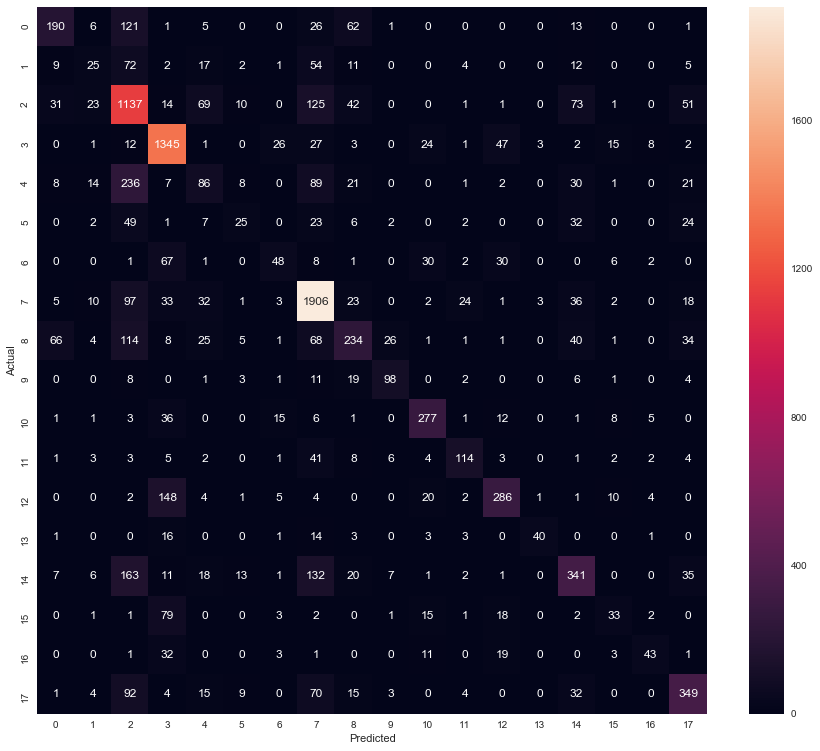

In [222]:
conf_mat = confusion_matrix(comparison.actual, comparison.predicted)
fig, ax = plt.subplots(figsize=(15,13))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [226]:
print(metrics.classification_report(ypred, y_test))

NameError: name 'metrics' is not defined

In [93]:
import re
import nltk

In [94]:
import string
# Importando todo NLTK
import nltk

# Tambien se puede importar modulos
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

#Downloading NLP corpus from NLTK 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\helen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [95]:
# Stop words = Creacion de un conjunto unico desde el listado de stopwords en ingles que viene con el paquete NLTK. 

#stop = set(stopwords.words('english'))

# Idem punto anterior, se excluyen signos de puntuacion 

exclude = set(string.punctuation) 

# Lemmatizacion de las palabras 
lemma = WordNetLemmatizer()

def clean(doc):
    #pasar a minusculas separando por espacios
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [96]:
datos_.variety.value_counts()

Pinot Noir                  8861
Cabernet Sauvignon          6527
Chardonnay                  6015
Syrah                       2937
Red Blend                   2523
Zinfandel                   2330
Merlot                      2000
Sauvignon Blanc             1898
Bordeaux-style Red Blend    1633
Riesling                    1531
Cabernet Franc               898
Rosé                         773
Pinot Gris                   757
Viognier                     714
Petite Sirah                 674
Rhône-style Red Blend        615
White Blend                  499
Sparkling Blend              303
Name: variety, dtype: int64

In [97]:
wine_data=datos_.groupby('variety')

In [98]:
wine_data.get_group('Red Blend')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,var_codes
20,20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont,2012.0,8
33,33,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,NaN,NaN,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,2010.0,8
45,45,US,Right out of the starting blocks this is an oa...,#SocialSecret,86,40.0,Virginia,Virginia,NaN,NaN,NaN,Tarara 2010 #SocialSecret Red (Virginia),Red Blend,Tarara,2010.0,8
68,68,US,"Very deep in color and spicy-smoky in flavor, ...",NaN,86,12.0,California,California,California Other,Jim Gordon,@gordone_cellars,Cocobon 2014 Red (California),Red Blend,Cocobon,2014.0,8
90,90,US,"This blend of Sangiovese, Malbec, Cabernet Sau...",Siena,88,23.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Ferrari-Carano 2014 Siena Red (Sonoma County),Red Blend,Ferrari-Carano,2014.0,8
161,161,US,A hearty blend of 76% Zinfandel and 24% Petite...,Mr. Nibbles,91,35.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Chronic Cellars 2013 Mr. Nibbles Red (Paso Rob...,Red Blend,Chronic Cellars,2013.0,8
213,213,US,"This blend of 60% Petite Sirah, 21% Syrah, 7% ...",1105,90,48.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,MCV 2014 1105 Red (Paso Robles),Red Blend,MCV,2014.0,8
229,229,US,"Not clear what the varietal blend is, but it's...",Costa Del Sol,85,18.0,California,Napa Valley,Napa,NaN,NaN,Benessere 2005 Costa Del Sol Red (Napa Valley),Red Blend,Benessere,2005.0,8
262,262,US,Beaver Creek makes a variation of Fairytale ev...,Fairytale,89,39.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Beaver Creek 2008 Fairytale Red (Napa Valley),Red Blend,Beaver Creek,2008.0,8
330,330,US,This Rhône-style blend is a little rustic and ...,Lila's Cuvée,86,40.0,California,Central Coast,Central Coast,NaN,NaN,Clos La Chance 2006 Lila's Cuvée Red (Central ...,Red Blend,Clos La Chance,2006.0,8


In [99]:
#bORRAMOS ALGUNAS PALABRAS MAS COMUNES EN LA DESCRIPTION
#borramos los nombres de las variety en la description
def clean_text(text):
    text = re.sub('rose', ' ', text)
    text = re.sub('cabernet sauvignon', ' ', text)
    text = re.sub('syrah', ' ', text)
    text = re.sub('red blend', ' ', text)
    text = re.sub('zinfandel', ' ', text)
    text = re.sub('sauvignon blanc', ' ', text)
    text = re.sub('bordeaux-style Red Blend', ' ', text)
    text = re.sub('zinfandel', ' ', text)
    text = re.sub('riesling', ' ', text)
    text = re.sub('cabernet franc', ' ', text)
    text = re.sub('merlot', ' ', text)
    text = re.sub('the', ' ', text)
    text = re.sub('wine', ' ', text)
    text = re.sub('drink', ' ', text)
    text = re.sub('acidity', ' ', text)
    text = re.sub('aroma', ' ', text)
    text = re.sub('aromas', ' ', text)
    text = re.sub('finish', ' ', text)
    text = re.sub('fruit', ' ', text)
    text = re.sub('palate', ' ', text)
    text = re.sub('sparkling blend', ' ', text)
    text = re.sub('pinot gris', ' ', text)
    text = re.sub('riesling', ' ', text)
    text = re.sub('petite sirah', ' ', text)

    return text

In [100]:
modelo_cvec = CountVectorizer(stop_words=stop)

In [101]:
datos_['description'] = datos_['description'].map(lambda com : clean(com))

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [102]:
datos_['description'] = datos_['description'].map(lambda com : clean_text(com))

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [103]:
datos_['description']= datos_['description'].apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [104]:
datos_['variety'].value_counts(normalize=True)

Pinot Noir                  0.213580
Cabernet Sauvignon          0.157323
Chardonnay                  0.144982
Syrah                       0.070792
Red Blend                   0.060813
Zinfandel                   0.056161
Merlot                      0.048207
Sauvignon Blanc             0.045748
Bordeaux-style Red Blend    0.039361
Riesling                    0.036902
Cabernet Franc              0.021645
Rosé                        0.018632
Pinot Gris                  0.018246
Viognier                    0.017210
Petite Sirah                0.016246
Rhône-style Red Blend       0.014824
White Blend                 0.012028
Sparkling Blend             0.007303
Name: variety, dtype: float64

In [105]:
datos_.shape

(41488, 16)

In [106]:
Cons = datos_['description']

In [107]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
vectorizer = CountVectorizer(min_df=0.05, max_df=0.9,stop_words=stop)
data_vectorized = vectorizer.fit_transform(Cons)

In [109]:
tf_feature_names = vectorizer.get_feature_names()

In [110]:
lda_model = LatentDirichletAllocation(n_topics=10, max_iter=30, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning:

n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21



In [111]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
8      15.940718        1       1  -67.095947 -147.447754
7      11.096617        1       2 -121.878761  -42.843483
6      11.034876        1       3  -88.612282  167.859955
0      10.298079        1       4   63.816166 -147.821091
4      10.111486        1       5   97.085243   62.885532
9      10.110313        1       6   42.300079  167.489471
2       9.058001        1       7 -169.730057   65.107445
1       9.035615        1       8  -35.915462   58.728149
3       8.142279        1       9   11.121032  -38.687099
5       5.172016        1      10  144.932571  -45.067585, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
23    Default   4162.000000        good   4162.000000  30.0000  30.0000
5     Default   8823.000000       black   8823.000000  29.0000  29.0000
47    Default   5911.000000       spice   5911.000000  28.0000  28.0000
52    Default   9322.000000      tannin   9322.000000  27.0000  27.0000
26    Default   4273.000000        herb   4273.000000  26.0000  26.0000
42    Default   4626.000000   raspberry   4626.000000  25.0000  25.0000
29    Default   4020.000000       light   4020.000000  24.0000  24.0000
30    Default   3277.000000        like   3277.000000  23.0000  23.0000
0     Default   3918.000000       apple   3918.000000  22.0000  22.0000
9     Default  12874.000000      cherry  12874.000000  21.0000  21.0000
44    Default   6242.000000        ripe   6242.000000  20.0000  20.0000
54    Default   2793.000000       taste   2793.000000  19.0000  19.0000
40    Default   3528.000000      pepper   3528.000000  18.0000  18.0000
10    Default   3472.000000   chocolate   3472.000000  17.0000  17.0000
53    Default   3120.000000        tart   3120.000000  16.0000  16.0000
17    Default   6046.000000         dry   6046.000000  15.0000  15.0000
46    Default   4268.000000        soft   4268.000000  14.0000  14.0000
15    Default   3921.000000        dark   3921.000000  13.0000  13.0000
24    Default   2865.000000       grape   2865.000000  12.0000  12.0000
13    Default   2839.000000       crisp   2839.000000  11.0000  11.0000
14    Default   3676.000000     currant   3676.000000  10.0000  10.0000
55    Default   3818.000000     texture   3818.000000   9.0000   9.0000
34    Default   5039.000000        nose   5039.000000   8.0000   8.0000
28    Default   2851.000000       lemon   2851.000000   7.0000   7.0000
16    Default   2638.000000       dried   2638.000000   6.0000   6.0000
6     Default   6346.000000  blackberry   6346.000000   5.0000   5.0000
7     Default   2495.000000    bottling   2495.000000   4.0000   4.0000
39    Default   2709.000000        pear   2709.000000   3.0000   3.0000
36    Default   7909.000000         oak   7909.000000   2.0000   2.0000
50    Default   4907.000000       sweet   4907.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
1     Topic10      0.116957     balance   2313.028945  -6.9304 -11.6384
33    Topic10      0.116946         new   2313.325340  -6.9306 -11.6385
51    Topic10      0.116952      tannic   2313.955506  -6.9308 -11.6385
4     Topic10      0.116951         bit   2366.582301  -6.9533 -11.6385
48    Topic10      0.116948       spicy   2382.436189  -6.9600 -11.6385
38    Topic10      0.116945       peach   2405.630094  -6.9697 -11.6385
27    Topic10      0.116947        hint   2453.060968  -6.9892 -11.6385
7     Topic10      0.116941    bottling   2495.301624  -7.0063 -11.6386
25    Topic10      0.116945       green   2523.765503  -7.0177 -11.6386
3     Topic10      0.116946       berry   2527.068156  -7.0190 -11.6385
16    Topic10      0.116940       dried   2638.563361  -7.0622 -11.6386
39    Topic10      0.116944        pear   2709.599153  -7.0887 -11.6386
56    Topic10      0.

In [112]:
lda_fit = lda_model.fit(data_vectorized)

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning:

n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21



In [113]:
# Ejecutamos un método de visualización de los tópicos

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from __future__ import print_function

In [114]:
pyLDAvis.save_html(panel, 'lda_topics_US10.html')

In [115]:
Cons = datos_['description']

In [116]:
# Guardamos en una nueva serie

Cons_clean = [clean(comment).split() for comment in Cons] 


In [117]:
from gensim import corpora, models 
import gensim

C:\Users\helen\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial

C:\Users\helen\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:20: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [118]:
# converting the corpus into a document-term matrix. every unique term is assigned an index.

dictionary = corpora.Dictionary(Cons_clean)

In [119]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above. Usamos doc2bow de gensim

doc_term_matrix = [dictionary.doc2bow(comment) for comment in Cons_clean]

In [120]:
X_lda = pd.DataFrame(lda_Z)

In [121]:
df_lda = X_lda.copy()

In [122]:
df_lda['Topico'] = df_lda.idxmax(axis=1)

In [123]:
df_lda.head()

,0,1,2,3,4,5,6,7,8,9,Topico
0,0.016667,0.397002,0.016669,0.224128,0.016669,0.016668,0.016670,0.016669,0.016668,0.262191,1
1,0.025002,0.025004,0.025008,0.025001,0.354919,0.025000,0.025000,0.025000,0.025001,0.445065,9
2,0.020000,0.020000,0.020000,0.220000,0.020000,0.420000,0.020000,0.020000,0.220000,0.020000,5
3,0.020004,0.020003,0.020003,0.020001,0.819974,0.020001,0.020002,0.020008,0.020002,0.020002,4
4,0.014291,0.157139,0.014289,0.014286,0.014290,0.014286,0.014289,0.014287,0.728556,0.014287,8


In [124]:
lda_model = LatentDirichletAllocation(n_topics=20, max_iter=30, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning:

n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21



In [125]:
pyLDAvis.enable_notebook()
panel20 = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel20

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
17     10.260468        1       1  130.762497 -101.393364
1       8.145779        1       2   80.507210  132.145966
6       7.123430        1       3   -6.188658  101.476158
13      6.040830        1       4  -76.390663  -22.192028
14      6.021031        1       5   53.142548  -86.032837
9       5.707887        1       6  -65.284813 -150.757919
2       5.594378        1       7   28.382895 -160.672974
15      5.340611        1       8   91.260414  -13.484552
0       5.125385        1       9  171.568542  -13.575188
5       4.858168        1      10    5.313087  181.305115
7       4.814672        1      11 -160.211365   90.396240
3       4.722348        1      12 -129.021317  -87.374741
12      4.688941        1      13   16.471546  -22.594799
4       4.511857        1      14 -158.132309   -3.053528
8       4.361051        1      15  136.184982   68.561485
19      3.830404        1      16  -80.721466  143.241119
10      2.887356        1      17  -22.809097   31.466228
16      2.778335        1      18   52.831558   51.033428
18      2.511122        1      19  -29.067390  -80.511314
11      0.675948        1      20  -88.156601   57.573601, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
36    Default   8109.000000         oak   8109.000000  30.0000  30.0000
5     Default   8592.000000       black   8592.000000  29.0000  29.0000
47    Default   6001.000000       spice   6001.000000  28.0000  28.0000
29    Default   4535.000000       light   4535.000000  27.0000  27.0000
44    Default   6367.000000        ripe   6367.000000  26.0000  26.0000
58    Default   4527.000000    vineyard   4527.000000  25.0000  25.0000
42    Default   4683.000000   raspberry   4683.000000  24.0000  24.0000
6     Default   6141.000000  blackberry   6141.000000  23.0000  23.0000
34    Default   4956.000000        nose   4956.000000  22.0000  22.0000
57    Default   4184.000000     vanilla   4184.000000  21.0000  21.0000
19    Default   3543.000000       fresh   3543.000000  20.0000  20.0000
15    Default   4030.000000        dark   4030.000000  19.0000  19.0000
26    Default   4157.000000        herb   4157.000000  18.0000  18.0000
50    Default   4829.000000       sweet   4829.000000  17.0000  17.0000
59    Default   3209.000000        well   3209.000000  16.0000  16.0000
45    Default   6121.000000        show   6121.000000  15.0000  15.0000
55    Default   3826.000000     texture   3826.000000  14.0000  14.0000
52    Default   9260.000000      tannin   9260.000000  13.0000  13.0000
9     Default  12874.000000      cherry  12874.000000  12.0000  12.0000
12    Default   2692.000000     complex   2692.000000  11.0000  11.0000
53    Default   3082.000000        tart   3082.000000  10.0000  10.0000
10    Default   3514.000000   chocolate   3514.000000   9.0000   9.0000
24    Default   2912.000000       grape   2912.000000   8.0000   8.0000
46    Default   4306.000000        soft   4306.000000   7.0000   7.0000
60    Default   3275.000000        year   3275.000000   6.0000   6.0000
1     Default   2631.000000     balance   2631.000000   5.0000   5.0000
43    Default   5661.000000        rich   5661.000000   4.0000   4.0000
0     Default   3702.000000       apple   3702.000000   3.0000   3.0000
40    Default   3430.000000      pepper   3430.000000   2.0000   2.0000
56    Default   2950.000000       touch   2950.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
3     Topic20     28.409409       berry   2497.160173   0.5206  -4.1109
39    Topic20     28.409409        pear   2569.042818   0.4922  -4.1109
16    Topic20     28.409409       dried   2575.220886   0.4898  -4.1109
1     Topic20     28.409409     balance   2631.431317   0.4682  -4.1109
13    Topic20    

In [ ]:
lda_fit = lda_model.fit(data_vectorized)

In [ ]:
pyLDAvis.save_html(panel20, 'lda_topics_US20.html')